**掛載雲端硬碟**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**import 套件**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
from IPython.display import display, clear_output
twfont1=plt_font.FontProperties(fname="drive/My Drive/DL_CLASS/kaiu.ttf")

**特徵縮放**

In [ ]:
#參數kind預設為0，做標準化；kind設為1，做歸一化
def FeatureScaling(data,kind=0):
  if kind==1:
    return (data-data.min())/(data.max()-data.min())
  else:
    return (data-data.mean())/data.std()

**導入資料**

In [ ]:
#由SalesVolume.csv檔案載入資料集
data= np.loadtxt("drive/My Drive/colab/SalesVolume.csv",delimiter=",")
data_x=FeatureScaling(data[0],0)#第1列為廣告推播次數，並做特徵縮放，第2參數設為0是標準化，設為1是歸一化
data_y=data[1]#第2列為商品銷售數量
#訓練資料集12筆
train_x=data_x[:12]
train_y=data_y[:12]
#驗證資料集8筆
valid_x=data_x[12:]
valid_y=data_y[12:]
print(data_x)

[ 1.47680664  1.17387194  0.11360051 -1.55254031 -0.79520357  0.87093725
 -1.40107296 -1.70400766  0.41653521  0.7194699  -0.18933418 -0.64373623
 -0.34080153 -0.49226888  0.26506786  1.93120868  0.26506786  0.26506786
 -1.24960562  0.87093725]


**產生自變數資料和依變數資料的矩陣**

In [ ]:
#垂直堆疊x,x**2,x**3，再轉置組成X矩陣
def Xmatrix(x):
  return np.vstack([x, x**2, x**3, x**4]).T

#將訓練集資料和驗證集資料的自變數x轉成[K列m+1行]矩陣
mtx_train_x=Xmatrix(train_x)
mtx_valid_x=Xmatrix(valid_x)
#將訓練集資料和驗證集資料的依變數y轉成[K列1行]矩陣
mtx_train_y=train_y.reshape((-1,1))
mtx_valid_y=valid_y.reshape((-1,1))


**隨機初始化迴歸係數矩陣**



In [ ]:
#亂數初始化迴歸係數為[m列1行]矩陣
b=np.random.rand(1)
W=np.random.rand(4).reshape((4,1))

**定義回歸模型的多項式矩陣**

In [ ]:
def F(x):
  return np.dot(x, W)+b

**定義損失函數LOSS** **Funcation**

In [ ]:
def Loss(x, y):
    return 0.5*np.sum((y-F(x))**2)

**設定學習率和權重更新次數**

In [ ]:
ETA = 0.0001
Step_Loss=[]

**開始訓練模型**

In [ ]:
for epoch in range(100000):
    #利用梯度下降更新迴歸係數
    b = b-ETA*np.sum(F(mtx_train_x)-mtx_train_y)
    W = W-ETA*np.dot(mtx_train_x.T,F(mtx_train_x)-mtx_train_y)
    if epoch%100==99:
        current_loss = Loss(mtx_train_x, mtx_train_y)
        Step_Loss.append(current_loss)
        print("訓練次數:",epoch+1,"\n偏值:",b,"\n權重:",W,"\n損失函數:",current_loss)
        clear_output(wait=True)

訓練次數: 100000 
偏值: [414.33983584] 
權重: [[131.09345237]
 [ 11.57499684]
 [-18.69458846]
 [  2.06867728]] 
損失函數: 1345.0488464782402


**畫圖檢查模型訓練結果**

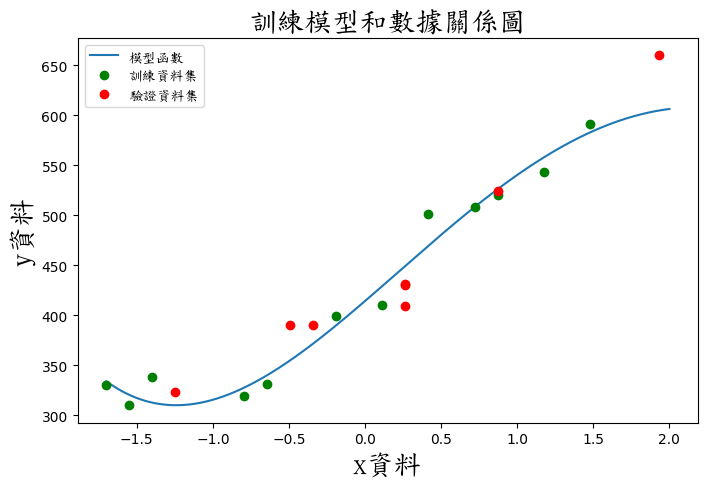

In [ ]:
plt.figure(figsize=(8,5))
plt.title("訓練模型和數據關係圖",fontproperties=twfont1,fontsize=20)
plt.xlabel("x資料",fontproperties=twfont1,fontsize=20)
plt.ylabel("y資料",fontproperties=twfont1,fontsize=20)
x = np.linspace(-1.7,2, 2000)
plt.plot(x, F(Xmatrix(x)),label="模型函數")
plt.plot(train_x, train_y, 'go',label="訓練資料集")
plt.plot(valid_x, valid_y, 'ro',label="驗證資料集")
plt.legend(prop=twfont1)
plt.show()

**觀察Loss值隨訓練次數的變化**

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20)
plt.xlabel("訓練次數(x100)",fontproperties=twfont1,fontsize=20)
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(Step_Loss,":o")
plt.show()